In [87]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import copy

import sys
sys.path.append('/home/preston/Desktop/Science/Research/pore_stats')

import rp_file
import resistive_pulse as rp

# Aesthetics

In [35]:
color_range_plasma = cm.plasma(np.linspace(1.0,0,21))
color_range_jet = cm.jet(np.linspace(1.0,0,21))
color_range = color_range_jet

bg_gray_color = (.6, .6, .6)

title_size = 20
axislabel_size = 20
axistick_size = 16
legendlabel_size = 20

# Open event files

In [101]:
events_directory = './data/events/'
file_name_base = '2016_08_23_Conical_pore_0_1MKCl_sweep_Co_075uM_PBS_0000'
file_path_1 = events_directory + file_name_base + 'V-1p0_events'
file_path_2 = events_directory + file_name_base + 'V-2p0_events'
file_path_3 = events_directory + file_name_base + 'V-3p0_events'
file_path_4 = events_directory + file_name_base + 'V-4p0_events'

events_1 = rp.open_event_file(file_path_1)
events_2 = rp.open_event_file(file_path_2)
events_3 = rp.open_event_file(file_path_3)
events_4 = rp.open_event_file(file_path_4)

In [102]:
events_list = [events_1, events_2, events_3, events_4]

In [103]:
for i, events in enumerate(events_list):
    for j, event in enumerate(events):
        event._amplitude = abs(np.max(event._data[:,1]) - np.min(event._data[:,1]))

# Oscillation scatter plots

In [104]:
scatter_data_list = [0 for i in range(len(events_list))]
for i, events in enumerate(events_list):
    scatter_data = np.empty((len(events), 2))
    for j, event in enumerate(events):
        scatter_data[j,0] = event._duration
        scatter_data[j,1] = event._amplitude
        
    scatter_data_list[i] = copy.deepcopy(scatter_data)

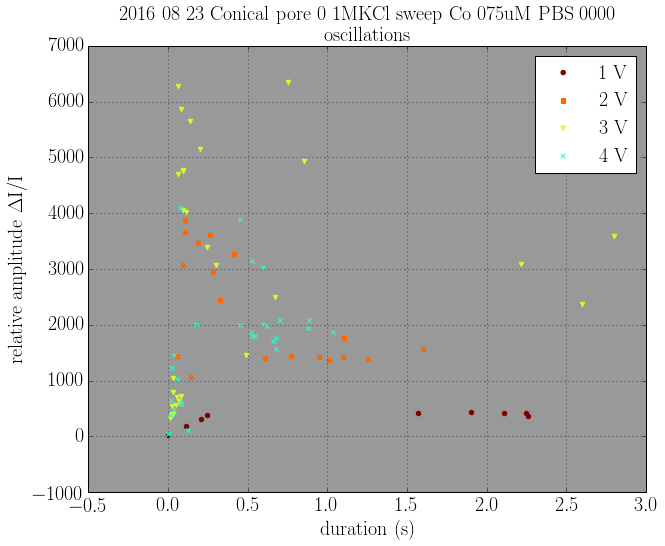

In [106]:
fig = plt.figure(figsize = (10,8))

ax = plt.gca()

ax.set_axis_bgcolor(bg_gray_color)

#dummy, = plt.plot([0], marker = 'None', linestyle = 'None', label = 'dummy')
labels = ['1 V', '2 V', '3 V', '4 V']
markers = ['o', 's', 'v', 'x']
for i in range(len(events_list)):
    plt.scatter(scatter_data_list[i][:,0], scatter_data_list[i][:,1],\
                color = color_range[4*i],\
                label = labels[i], marker = markers[i])

#plt.xlim(0,.01)
#plt.ylim(0,.04)


plt.legend(loc = 'upper right', fontsize = legendlabel_size, scatterpoints = 1)
#leg = plt.legend(loc = 'upper right', scatterpoints = 1, fontsize = 16)
#leg.set_zorder(200)

plt.title(str(file_name_base).replace('_', ' ') + '\noscillations', size = title_size)
plt.xlabel('duration (s)', size = axislabel_size)
plt.ylabel(r'relative amplitude $\Delta$I/I', size = axislabel_size)

plt.tick_params(axis='both', which='major', labelsize=axistick_size)
plt.tick_params(axis='both', which='minor', labelsize=axistick_size)

plt.grid()

#plt.savefig('HCT-116_7-29_15um-20um_8-2_scatter.png', dpi = 300)

plt.show()

# Current leveling

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import copy

import sys
sys.path.append('/home/preston/Desktop/Science/Research/pore_stats')

import rp_file
import resistive_pulse as rp

import sklearn.cluster

### Load data

In [2]:
events_directory = '/home/preston/Desktop/Science/Research/precipitation/data/bts/raw/'
file_name_base = '2016_08_23_Conical_pore_0_1MKCl_sweep_Co_0_075uM_PBS_0000'
file_path_1 = events_directory + file_name_base + 'V_-1p0.bts'
file_path_2 = events_directory + file_name_base + 'V_-2p0.bts'
file_path_3 = events_directory + file_name_base + 'V_-3p0.bts'
file_path_4 = events_directory + file_name_base + 'V_-4p0.bts'

data_1 = rp_file.get_data(file_path_1)
data_2 = rp_file.get_data(file_path_2)
data_3 = rp_file.get_data(file_path_3)
data_4 = rp_file.get_data(file_path_4)

### Leveling

In [3]:
levels_1 = np.array([[0],[200],[400]])
levels_2 = np.array([[0],[1250],[3000]])
levels_3 = np.array([[0],[2000],[5000]])
levels_4 = np.array([[0],[2000],[4000]])

In [4]:
levels = [levels_1, levels_2, levels_3, levels_4]

In [5]:
model_1 = sklearn.cluster.KMeans(n_clusters = 3)
model_1.cluster_centers_ = levels_1

model_2 = sklearn.cluster.KMeans(n_clusters = 3)
model_2.cluster_centers_ = levels_2

model_3 = sklearn.cluster.KMeans(n_clusters = 3)
model_3.cluster_centers_ = levels_3

model_4 = sklearn.cluster.KMeans(n_clusters = 3)
model_4.cluster_centers_ = levels_4

In [8]:
pred_levels_1 = model_1.predict(data_1[:,1].reshape(-1,1))
pred_levels_2 = model_2.predict(data_2[:,1].reshape(-1,1))
pred_levels_3 = model_3.predict(data_3[:,1].reshape(-1,1))
pred_levels_4 = model_4.predict(data_4[:,1].reshape(-1,1))

In [9]:
data_1 = np.hstack((data_1, pred_levels_1.reshape(-1,1)))
data_2 = np.hstack((data_2, pred_levels_2.reshape(-1,1)))
data_3 = np.hstack((data_3, pred_levels_3.reshape(-1,1)))
data_4 = np.hstack((data_4, pred_levels_4.reshape(-1,1)))

In [10]:
for i in range(data_1.shape[0]):
    data_1[i,2] = levels_1[int(data_1[i,2])]
    
for i in range(data_2.shape[0]):
    data_2[i,2] = levels_2[int(data_2[i,2])]
    
for i in range(data_3.shape[0]):
    data_3[i,2] = levels_3[int(data_3[i,2])]
    
for i in range(data_4.shape[0]):
    data_4[i,2] = levels_4[int(data_4[i,2])]

### Analysis

##### Levels 1-D scatter

In [62]:
import random as ra

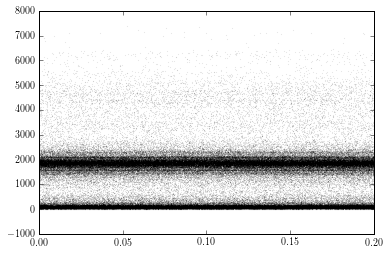

In [72]:
fig = plt.figure(figsize = (8,6))

ax = plt.gca()

random_offset = np.random.rand(data_3.shape[0])
plt.scatter(random_offset, data_3[:,1], s = .001)
plt.xlim(0,.2)
plt.show()

#### Levels plot

In [44]:
c_l = [(1,.3,.3), (.3,1,.3), (.3,.3,1)]

In [70]:
c = np.empty((data_3.shape[0],3))
for i in range(data_3.shape[0]):
    if data_3[i,2] == levels_3[0]:
        c[i] = c_l[0]
    elif data_3[i,2] == levels_3[1]:
        c[i] = c_l[1]
    elif data_3[i,2] == levels_3[2]:
        c[i] = c_l[2]

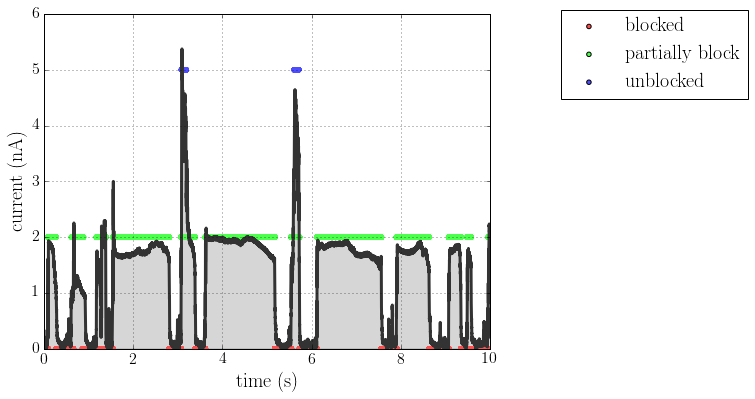

In [71]:
fig = plt.figure(figsize = ((8,6)))
ax = plt.gca()
ax.fill_between(data_3[:,0], 0, data_3[:,1]/1000, facecolor = (.2,.2,.2), alpha = 0.2)
plt.scatter(data_3[:,0], data_3[:,2]/1000, zorder = 2, color = c)
plt.plot(data_3[:,0], data_3[:,1]/1000, lw = 3, zorder = 2, c = (.2,.2,.2))

# legend
plt.scatter(None, None, label = 'blocked', c = c_l[0])
plt.scatter(None, None, label = 'partially block', c = c_l[1])
plt.scatter(None, None, label = 'unblocked', c = c_l[2])
plt.legend(fontsize = legendlabel_size, scatterpoints = 1, bbox_to_anchor = (1.6,1.0425))

plt.grid()
plt.xlim(0,10)
plt.ylim(0,6000/1000)


plt.xlabel('time (s)', size = axislabel_size)
plt.ylabel('current (nA)', size = axislabel_size)
plt.tick_params(axis = 'both', which = 'major', labelsize = axistick_size)

#plt.savefig('./current leveling.png', dpi = 300)
plt.show()

##### Time spent in each state

In [11]:
time_fraction_1 = np.empty(3)
time_fraction_2 = np.empty(3)
time_fraction_3 = np.empty(3)
time_fraction_4 = np.empty(3)

# Voltage 1
time_fraction_1[0] = 1.*np.sum(data_1[:,2] == levels_1[0])/data_1.shape[0]
time_fraction_1[1] = 1.*np.sum(data_1[:,2] == levels_1[1])/data_1.shape[0]
time_fraction_1[2] = 1.*np.sum(data_1[:,2] == levels_1[2])/data_1.shape[0]

# Voltage 2
time_fraction_2[0] = 1.*np.sum(data_2[:,2] == levels_2[0])/data_2.shape[0]
time_fraction_2[1] = 1.*np.sum(data_2[:,2] == levels_2[1])/data_2.shape[0]
time_fraction_2[2] = 1.*np.sum(data_2[:,2] == levels_2[2])/data_2.shape[0]

# Voltage 3
time_fraction_3[0] = 1.*np.sum(data_3[:,2] == levels_3[0])/data_3.shape[0]
time_fraction_3[1] = 1.*np.sum(data_3[:,2] == levels_3[1])/data_3.shape[0]
time_fraction_3[2] = 1.*np.sum(data_3[:,2] == levels_3[2])/data_3.shape[0]

# Voltage 4
time_fraction_4[0] = 1.*np.sum(data_4[:,2] == levels_4[0])/data_4.shape[0]
time_fraction_4[1] = 1.*np.sum(data_4[:,2] == levels_4[1])/data_4.shape[0]
time_fraction_4[2] = 1.*np.sum(data_4[:,2] == levels_4[2])/data_4.shape[0]

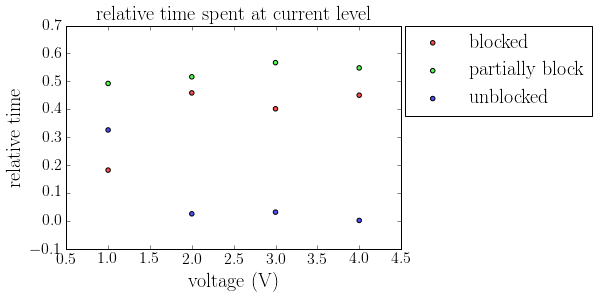

In [61]:
plt.scatter(np.ones(3)*1, time_fraction_1, c = c_l)
plt.scatter(np.ones(3)*2, time_fraction_2, c = c_l)
plt.scatter(np.ones(3)*3, time_fraction_3, c = c_l)
plt.scatter(np.ones(3)*4, time_fraction_4, c = c_l)

# legend
plt.scatter(None, None, label = 'blocked', c = c_l[0])
plt.scatter(None, None, label = 'partially block', c = c_l[1])
plt.scatter(None, None, label = 'unblocked', c = c_l[2])
plt.legend(fontsize = legendlabel_size, scatterpoints = 1, bbox_to_anchor = (1.6,1.0425))

plt.title('relative time spent at current level', size = title_size)
plt.xlabel('voltage (V)', size = axislabel_size)
plt.ylabel('relative time', size = axislabel_size)

plt.tick_params(axis = 'both', which = 'major', labelsize = axistick_size)

plt.show()

##### PSD

In [14]:
from scipy.signal import welch

In [29]:
nperseg = 100000
f_1, Pxx_1 = welch(data_1[:,1], fs=20000, nperseg = nperseg)
f_2, Pxx_2 = welch(data_2[:,1], fs=20000, nperseg = nperseg)
f_3, Pxx_3 = welch(data_3[:,1], fs=20000, nperseg = nperseg)
f_4, Pxx_4 = welch(data_4[:,1], fs=20000, nperseg = nperseg)

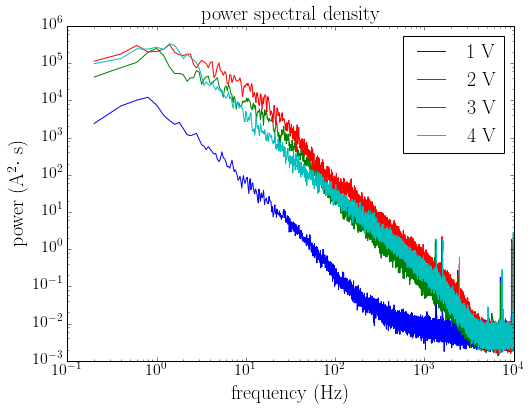

In [41]:
fig = plt.figure(figsize = (8,6))

plt.loglog(f_1, Pxx_1, label = '1 V')
plt.loglog(f_2, Pxx_2, label = '2 V')
plt.loglog(f_3, Pxx_3, label = '3 V')
plt.loglog(f_4, Pxx_4, label = '4 V')

plt.legend(loc = 'upper right', fontsize = legendlabel_size)

plt.title('power spectral density', size = title_size)
plt.xlabel('frequency (Hz)', size = axislabel_size)
plt.ylabel(r'power (A$^{2}$$\cdot$ s)', size = axislabel_size)

plt.tick_params(axis = 'both', which = 'major', labelsize = axistick_size)

plt.show()

### Output

In [42]:
output_data_3 = np.hstack((data_3[:,0].reshape(-1,1), levels_3.reshape(-1,1)))
print output_data_3.shape

(863968, 2)


In [44]:
output_file_directory = '/home/preston/Desktop/Science/Research/precipitation/data/bts/levels/'
#output_file_path_1 = output_file_directory + file_base_name + 'V_-1p0_levels.bts'
#output_file_path_2 = output_file_directory + file_base_name + 'V_-2p0_levels.bts'
output_file_path_3 = output_file_directory + file_name_base + 'V_-3p0_levels.bts'
#output_file_path_4 = output_file_directory + file_base_name + 'V_-4p0_levels.bts'
rp_file.np_to_bts(output_file_path_3, output_data_3)

In [45]:
levels_3_0 = levels_3==0

In [46]:
print levels_3_0

[ True  True  True ..., False False False]
